In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


## 1. Data Understanding & Preprocessing

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df.isnull()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
49063,True,False,False,False,False,False,False,False,False,False
49064,True,False,False,False,False,False,False,False,False,False
49065,True,False,False,False,False,False,False,False,False,False
49066,True,False,False,False,False,False,False,False,False,False


In [5]:
print('\nNumber of duplicate rows:',df.duplicated().sum())


Number of duplicate rows: 0


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
print('\nDate column after conversion to datetime:',df['Date'].dtype)


Date column after conversion to datetime: datetime64[ns]


## 2.Descriptive Analysis

## a. Total Cases & Deaths

In [16]:
total_by_country = df.groupby('Country/Region')[['Confirmed','Deaths']].max().sort_values(by='Confirmed',ascending=False)
print('\nTotal Confirmed and Deaths by Country:')
print(total_by_country)


Total Confirmed and Deaths by Country:
                       Confirmed  Deaths
Country/Region                          
US                       4290259  148011
Brazil                   2442375   87618
India                    1480073   33408
Russia                    816680   13334
South Africa              452529    7067
...                          ...     ...
Dominica                      18       0
Saint Kitts and Nevis         17       0
Greenland                     14       0
Holy See                      12       0
Western Sahara                10       1

[187 rows x 2 columns]


In [19]:
print('\nCountry with highest Confirmed cases:', total_by_country['Confirmed'].idxmax())
print('Country with highest Deaths:', total_by_country['Deaths'].idxmax()) 


Country with highest Confirmed cases: US
Country with highest Deaths: US


## b. Trend Analysis

In [11]:
import matplotlib.pyplot as plt

In [21]:
india = df[df['Country/Region']=='India'].groupby('Date')[['Confirmed','Deaths']].sum()

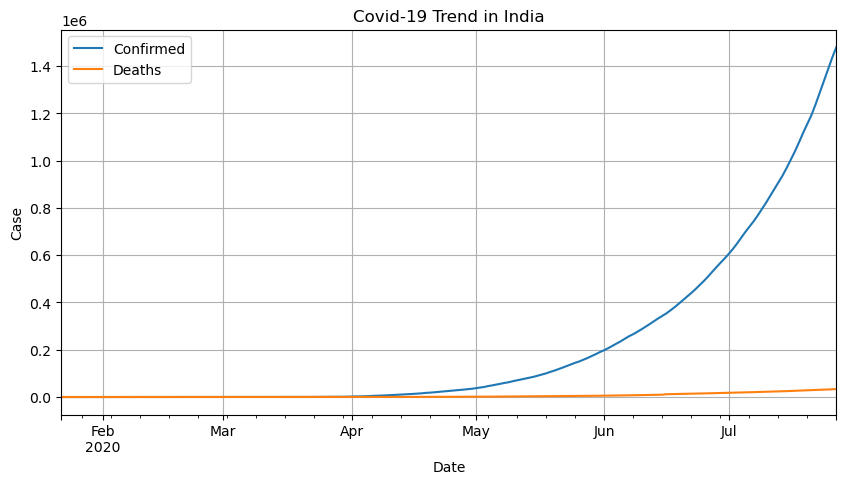

In [22]:
india.plot(figsize=(10,5),title='Covid-19 Trend in India')
plt.ylabel('Case')
plt.grid()
plt.show()

## d. Cases per Population

In [25]:
if 'Population' in df.columns:
    latest = df.groupby('Country/Region').last()
    latest['Cases per 1000'] = (latest['Confirmed']/latest['Population'])*1000
    print('Covid-19 Cases per 1000 People:')
    print(latest[['Cases per 1000']].sort_values(by='Cases per 1000',ascending = False))


In [24]:
## There was no Populaation Column

## 3. Comparative Analysis

## a) Countrywise Comparison(Highest and Lowest Confirmed/Death)

In [25]:
highest_confirmed = df.groupby('Country/Region')['Confirmed'].max().idxmax()
lowest_confirmed =df.groupby('Country/Region')['Confirmed'].max().idxmin()

                                                                    

In [26]:
highest_deaths = df.groupby('Country/Region')['Deaths'].max().idxmax()
lowest_deaths =df.groupby('Country/Region')['Deaths'].max().idxmin()

In [27]:
print(f"Highest Confirmed Cases:{highest_confirmed}")
print(f"Lowest Confirmed Cases:{lowest_confirmed }")
print(f"Highest Deaths:{highest_deaths}")
print(f"Lowest Deaths:{lowest_deaths}")

Highest Confirmed Cases:US
Lowest Confirmed Cases:Western Sahara
Highest Deaths:US
Lowest Deaths:Bhutan


## b) Testing & Positivity Rates(Correlation between Tests and Confirmed)

In [32]:
if 'Tests' in df.columns:
    grouped = df.groupby('Country/Region').last()
    correlation =grouped[['Tests','Confirmed']].corr().iloc[0,1]
    print('Correlation between Tests and Confirmed cases:',correlation)

else :
    print('No Correlation Between Them')

No Correlation Between Them


## c) Recovery vs Death Rate

In [39]:
latest_data = df.groupby('Country/Region').last()
latest_data['Recovery Rate']=latest_data['Recovered']/latest_data['Confirmed']
latest_data['Death Rate']=latest_data['Deaths']/latest_data['Confirmed']
print('Recovery vs Death Rate:')
print(latest_data[['Recovery Rate','Death Rate']].dropna().sort_values(by='Recovery Rate',ascending=False))

Recovery vs Death Rate:
                Recovery Rate  Death Rate
Country/Region                           
Holy See             1.000000    0.000000
Grenada              1.000000    0.000000
Dominica             1.000000    0.000000
United Kingdom       1.000000    0.000000
China                0.998425    0.000787
...                       ...         ...
Mozambique           0.000000    0.006467
Timor-Leste          0.000000    0.000000
Sweden               0.000000    0.071793
Netherlands          0.000000    0.115539
Canada               0.000000    0.000000

[187 rows x 2 columns]


## 4. Predictive Modeling

## a. Prdiction Future Cases(e.g, India)

In [40]:
from sklearn.linear_model import LinearRegression
import numpy as np

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


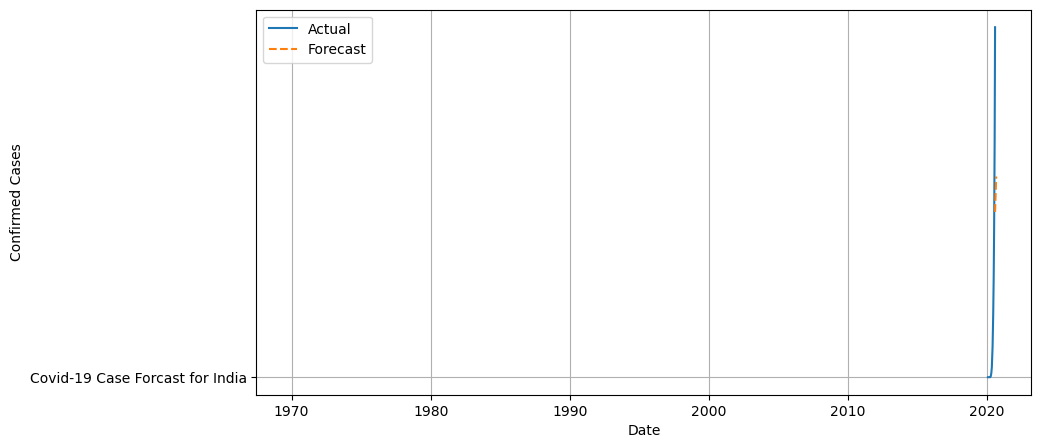

In [42]:
india_ts = df[df['Country/Region']=='India'].groupby('Date')['Confirmed'].sum().reset_index()
india_ts['DateOrdinal']=india_ts['Date'].map(pd.Timestamp.toordinal)
x= india_ts[['DateOrdinal']]
y = india_ts['Confirmed']
model = LinearRegression()
model.fit(x,y)
future_dates = pd.date_range(india_ts['Date'].max(),periods=30)
future_ordinal =future_dates.map(pd.Timestamp.toordinal).values.reshape(-1,1)
future_preds = model.predict(future_ordinal)
plt.figure(figsize=(10,5))
plt.plot(india_ts['Date'],india_ts['Confirmed'],label='Actual')
plt.plot(future_dates,future_preds,label='Forecast',linestyle='--')
plt.plot('Covid-19 Case Forcast for India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()
plt.show()


## 5. Correlation and Casuality

## a. Correlation Between Confirmed and Deaths

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation Between Confirmed and Deaths: 0.9124


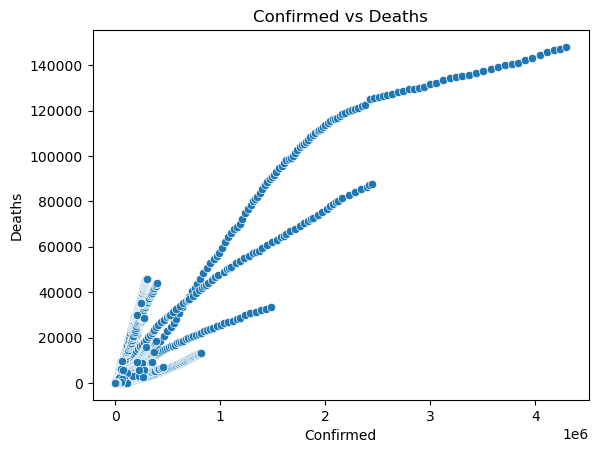

In [5]:
df=df.dropna(subset=['Confirmed','Deaths'])
correlation = df['Confirmed'].corr(df['Deaths'])
print(f"Correlation Between Confirmed and Deaths: {correlation:.4f}")
sns.scatterplot(x='Confirmed',y='Deaths',data=df)
plt.title('Confirmed vs Deaths')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

                    Confirmed       Deaths
Lockdown                                  
Before/After     20543.640424  1005.147753
During Lockdown   9449.408170   638.339760


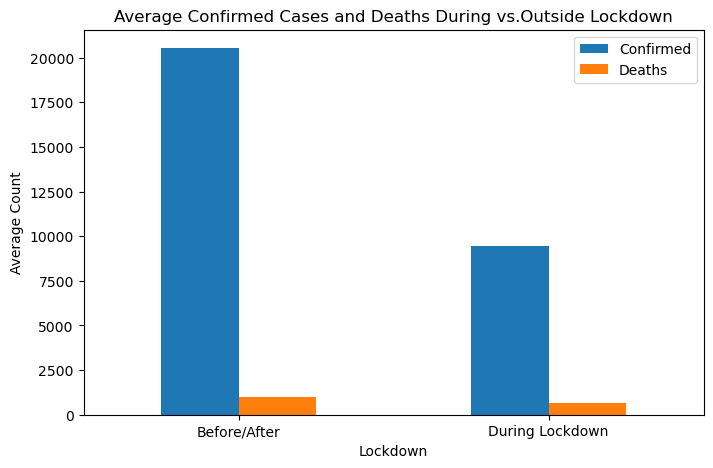

In [6]:
df ['Date']=pd.to_datetime(df['Date'])
lockdown_start = pd.to_datetime('2020-3-20')
lockdown_end = pd.to_datetime('2020-5-20')
df['Lockdown']=df['Date'].apply(lambda x:'During Lockdown'if lockdown_start <= x <= lockdown_end else 'Before/After')
df= df.dropna(subset=['Confirmed','Deaths'])
summary = df.groupby('Lockdown')[['Confirmed','Deaths']].mean()
print (summary)
summary.plot(kind='bar',figsize=(8,5))
plt.title('Average Confirmed Cases and Deaths During vs.Outside Lockdown')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()

## 6. Visualization

## a.Heatmap for Geographical Spread

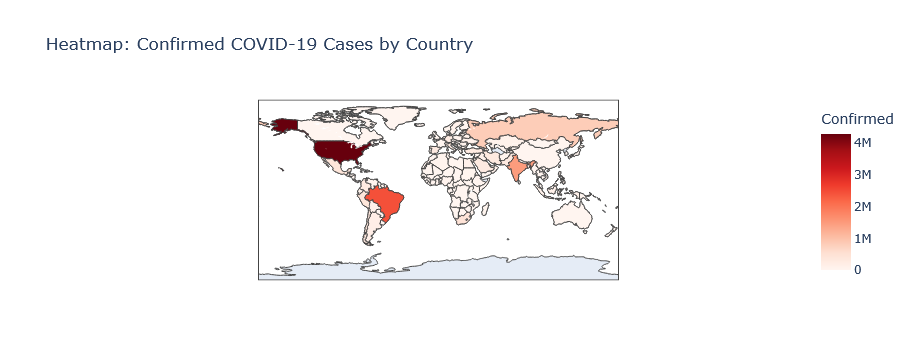

In [8]:
import plotly.express as px
heat_data = df.groupby('Country/Region').last().reset_index()
fig = px.choropleth(
    heat_data,
    locations='Country/Region',
    locationmode='country names',
    color='Confirmed',
    hover_name='Country/Region',
    color_continuous_scale = 'Reds',
    title='Heatmap: Confirmed COVID-19 Cases by Country'
)
fig.show()

## b. Line Chart:Confirmed and Deaths over Time

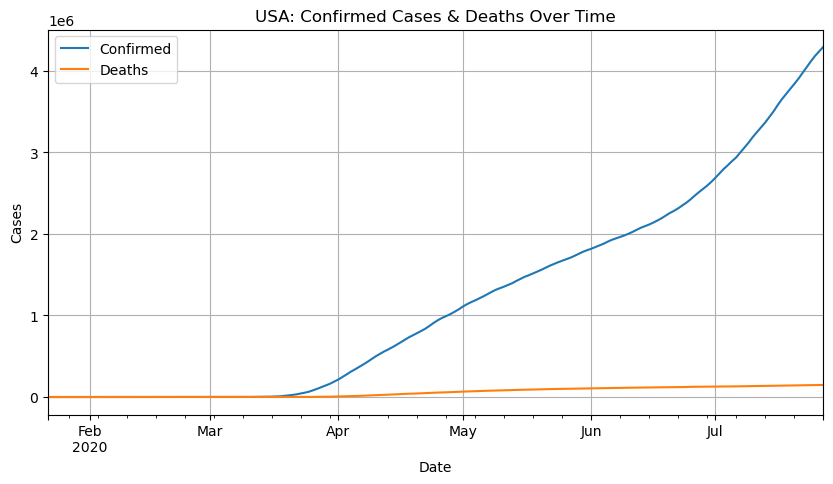

In [46]:
usa = df[df['Country/Region']=='US'].groupby('Date')[['Confirmed','Deaths']].sum()
usa.plot(title='USA: Confirmed Cases & Deaths Over Time',figsize=(10,5))
plt.grid()
plt.ylabel('Cases')
plt.xlabel('Date')
plt.show()

## c. Bar Chart:Top 10 Countries by Confirmed Deaths,Recovery

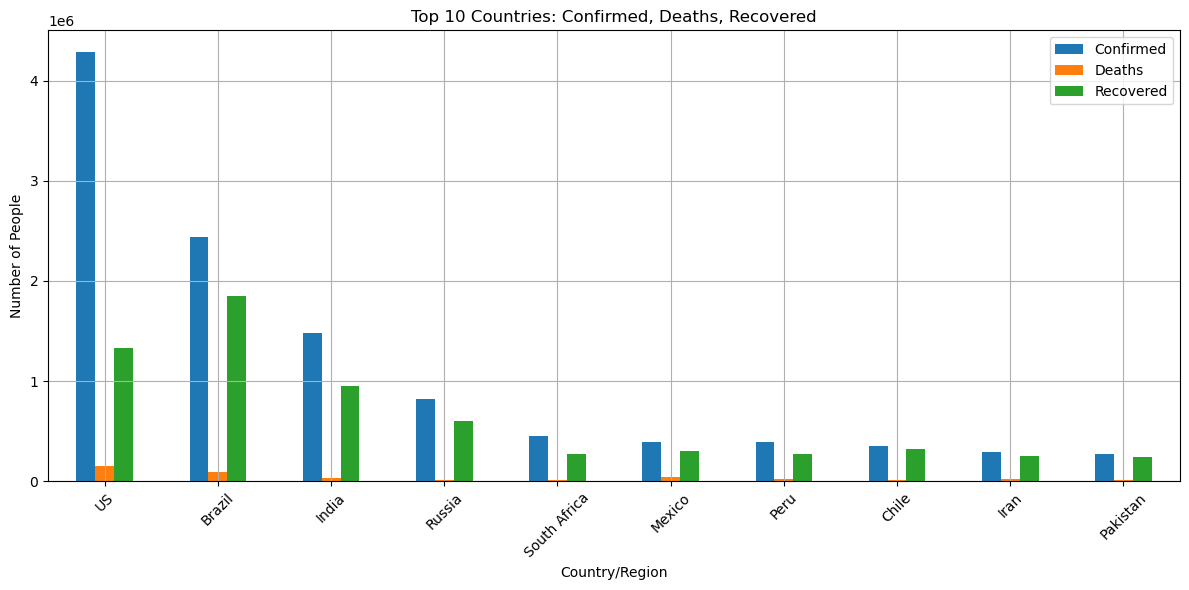

In [21]:

top10 = df.groupby('Country/Region').last()[['Confirmed', 'Deaths', 'Recovered']].sort_values(by='Confirmed', ascending=False).head(10)

top10.plot(kind='bar', figsize=(12, 6), title='Top 10 Countries: Confirmed, Deaths, Recovered')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


## d.Pie Chart: Global Distribuition of Cases

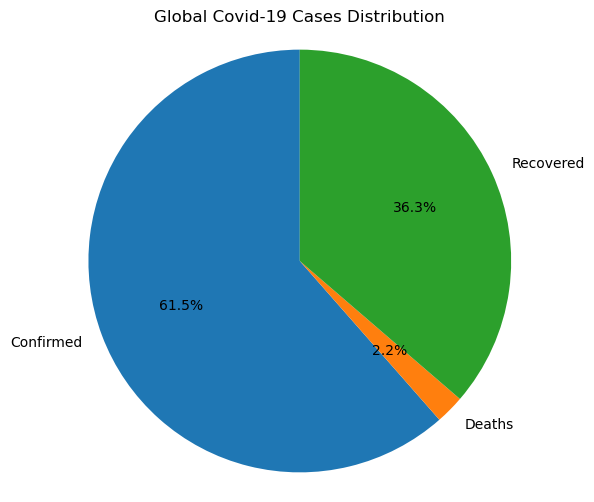

In [18]:
global_data = df.groupby('Country/Region').last()
global_totals = global_data[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot
labels = ['Confirmed', 'Deaths', 'Recovered']
sizes = [global_totals['Confirmed'], global_totals['Deaths'], global_totals['Recovered']]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Global Covid-19 Cases Distribution')
plt.axis('equal')
plt.show()

## 7. Advance Analysis

## 1. K-Means Clusturing: Group country by severity

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
0    178
3      7
2      1
1      1
Name: count, dtype: int64


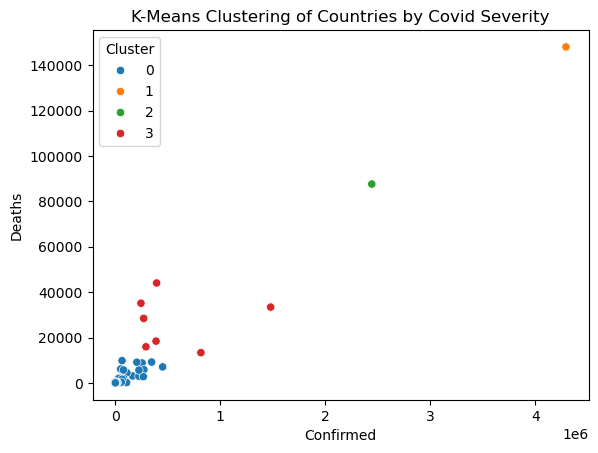

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

latest = df.groupby('Country/Region').last()[['Confirmed', 'Deaths']].dropna()
X = latest.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
latest['Cluster'] = kmeans.fit_predict(X_scaled)
print(latest['Cluster'].value_counts())
import seaborn as sns
sns.scatterplot(data=latest, x='Confirmed', y='Deaths', hue='Cluster', palette='tab10')
plt.title("K-Means Clustering of Countries by Covid Severity")
plt.show()

## 2. Risk Factor: Population Density & Cases

In [23]:
## Because there was no population column in CSV so I can't figureout this

## 3. Correlation: Confirmed vs Deaths

In [15]:
correlation = latest[['Confirmed', 'Deaths']].corr().iloc[0, 1]
print("Pearson Correlation between Confirmed and Deaths:", correlation)

Pearson Correlation between Confirmed and Deaths: 0.9568639648446612


## 4. Impact of Lockdown 

In [16]:
lockdown_date = pd.to_datetime("2020-03-25") 
country = "India"

country_data = df[df['Country/Region'] == country].groupby('Date')['Confirmed'].sum()

before = country_data[(country_data.index >= lockdown_date - pd.Timedelta(days=15)) & (country_data.index < lockdown_date)].mean()
after = country_data[(country_data.index >= lockdown_date) & (country_data.index < lockdown_date + pd.Timedelta(days=15))].mean()

print(f"\n{country} - Avg confirmed cases 15 days BEFORE lockdown: {before:.0f}")
print(f"{country} - Avg confirmed cases 15 days AFTER lockdown: {after:.0f}")


India - Avg confirmed cases 15 days BEFORE lockdown: 207
India - Avg confirmed cases 15 days AFTER lockdown: 2448
